In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import manifold
from sklearn import datasets

In [ ]:
!git clone https://github.com/kunupat/python-unit-test

fatal: destination path 'python-unit-test' already exists and is not an empty directory.


In [ ]:
data=datasets.fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True
)


In [ ]:
pixels_value,targets=data

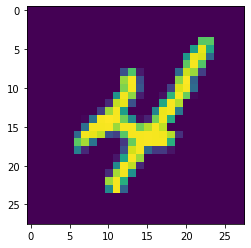

In [ ]:
single_image=pixels_value[9,:].reshape(28,28)
plt.imshow(single_image)

In [ ]:
tsne=manifold.TSNE(n_components=2,random_state=56,perplexity=30)
transformned_data=tsne.fit_transform(pixels_value[:30000,:])

In [ ]:
targets=targets.astype(int)

In [ ]:
tsne_df=pd.DataFrame(
    np.column_stack((transformned_data,targets[:30000])),
    columns=["x","y","targets"]
)

In [ ]:
tsne_df.head()

,x,y,targets
0,-33.940350,-3.496185,5.0
1,-14.110611,44.507141,0.0
2,-9.488441,-61.566029,4.0
3,40.412949,15.098712,1.0
4,17.835711,-31.910192,9.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


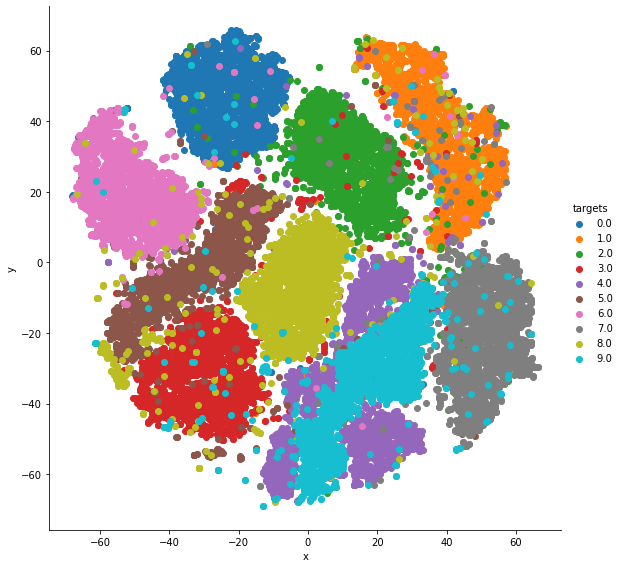

In [ ]:
grid=sns.FacetGrid(tsne_df,hue="targets",size=8)
grid.map(plt.scatter,"x","y").add_legend()